In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\kk\AppData\Local\Temp\ipykernel_7772\107228863.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [4]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [5]:
df.shape

(7461195, 13)

In [6]:
df2 = df[df["Event name"].str.split("(").str.get(1).str[:-1] == "USA"]


In [7]:
df2 = df2[df2["Event distance/length"].isin(["50km", "50mi"])]

In [8]:
df2 = df2[df["Year of event"] == 2020]

C:\Users\kk\AppData\Local\Temp\ipykernel_7772\1697941674.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df["Year of event"] == 2020]


In [9]:
df2["Event name"] = df2["Event name"].str.split("(").str.get(0)

In [10]:

df2["athlete_age"] = 2020 - df["Athlete year of birth"]

In [11]:
df2["Athlete performance"] = df2["Athlete performance"].str.split("h").str.get(0)

In [12]:
df2 = df2.drop(["Athlete club", "Athlete year of birth", "Athlete age category", "Athlete country"], axis=1)

In [13]:
df2 = df2.dropna()

In [14]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [15]:
df2.rename(columns={"Athlete name": "athlete_name", "Event name": "event_name", "Event distance/length": "event_distance_length", "Year of event": "year_of_event", "Athlete performance": "athlete_performance"}, inplace=True)

In [16]:
df2 = df2.reset_index(drop=True)

In [17]:
df2.drop(["index", "level_0"], axis=1, inplace=True, errors='ignore')

In [18]:
df2.head()

,year_of_event,Event dates,event_name,event_distance_length,Event number of finishers,athlete_performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


<Axes: xlabel='event_distance_length', ylabel='Count'>

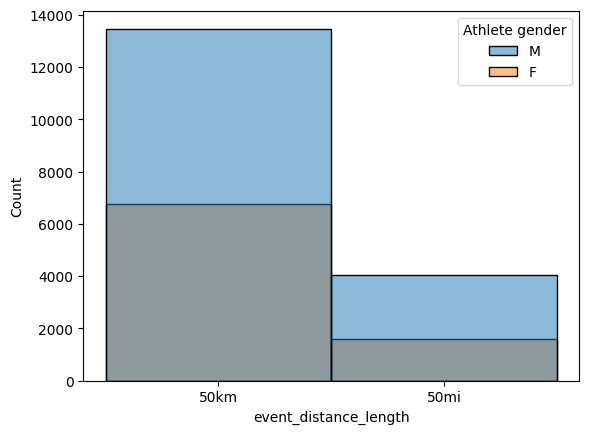

In [19]:

sns.histplot(df2, x="event_distance_length", hue="Athlete gender")

In [20]:
df2.dtypes

year_of_event                  int64
Event dates                   object
event_name                    object
event_distance_length         object
Event number of finishers      int64
athlete_performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [21]:
df2["Athlete average speed"] = df2["Athlete average speed"].astype("float64")

In [22]:
df2.dtypes

year_of_event                  int64
Event dates                   object
event_name                    object
event_distance_length         object
Event number of finishers      int64
athlete_performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                  float64
dtype: object

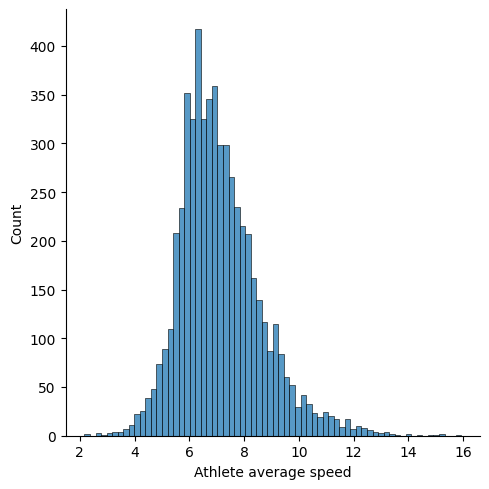

In [23]:
sns.displot(df2[df2["event_distance_length"] == "50mi"]["Athlete average speed"])

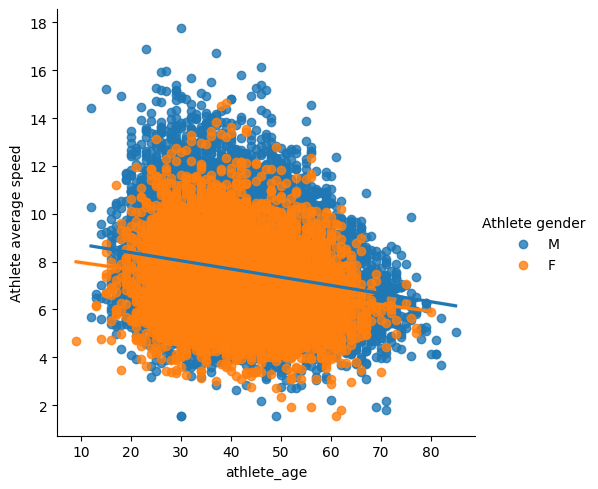

In [24]:
sns.lmplot(data=df2, x="athlete_age", y="Athlete average speed", hue="Athlete gender")

In [ ]:
#Who preforms better in terms of speed, males or females ?

In [50]:
df2.head()

,year_of_event,Event dates,event_name,event_distance_length,Event number of finishers,athlete_performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [51]:
df2.groupby("Athlete gender")["Athlete average speed"].mean()

Athlete gender
F    7.036009
M    7.627686
Name: Athlete average speed, dtype: float64

In [ ]:
#which age group are the fastest with haivng a minimum of 20 runners in that age group

In [49]:
df2.query("event_distance_length == '50mi'").groupby("athlete_age")["Athlete average speed"].agg(["mean", "count"]).query("count > 19").sort_values("mean", ascending=False)

,mean,count
athlete_age,,
29.0,7.902252,135
23.0,7.779800,55
28.0,7.575252,107
30.0,7.569204,157
25.0,7.540923,91
31.0,7.451638,138
38.0,7.430022,231
35.0,7.422359,195
36.0,7.403854,185


In [ ]:
#Which seasons are athletes fastest in?
#Spring 3-6
#Summer 6-9
#Fall 9-11
#Winter 11-2

In [59]:
df2["race_month"] = df2["Event dates"].str.split(".").str.get(1).astype("int")
df2.head()

,year_of_event,Event dates,event_name,event_distance_length,Event number of finishers,athlete_performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age,race_month
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0,2
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0,2
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0,2
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0,2
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0,2


In [69]:
df2["race_season"] = df2["race_month"].apply(lambda x: "Spring" if 3 <= x <= 5 else "Summer" if 6 <= x <= 8 else "Fall" if 9 <= x <= 11 else "Winter")
df2.head()

,year_of_event,Event dates,event_name,event_distance_length,Event number of finishers,athlete_performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age,race_month,race_season
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0,2,Winter
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0,2,Winter
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0,2,Winter
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0,2,Winter
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0,2,Winter


In [72]:
df2.groupby("race_season")["Athlete average speed"].agg(["mean", "count"]).sort_values("mean", ascending=False)

,mean,count
race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653
